In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

Define the model:
- inherit from `nn.Module`
    - `super(ModelName, self).__init__()`
- `forward` to predict
- `modelName = ModelName(); print(modelName)` lists model layers
- `print(list(modelName.parameters()))` lists all learnable parameters
- `modelName.named_parameters()` gives `name` and `param` 

Training:
- `modelName.zero_grad()`: zeroes the gradient buffers of all parameters
- `loss.backward()`: backpropagate the errors
- `optimizer.step()`: update the parameters

# Regression

In [2]:
# dummy training data
n_samples = 100
x_dummy = np.linspace(-3, 3, n_samples)

# linear function
# y_dummy = 3 * x_dummy + 5 + np.random.uniform(-5, 5, n_samples) # with random noise

# cos() function
y_dummy = np.cos(x_dummy) + np.random.uniform(-3, 3, n_samples)

# 64-bit floating numpy array and will be converted to torch.DoubleTensor standardly
# https://stackoverflow.com/questions/44717100/pytorch-convert-floattensor-into-doubletensor
x = torch.from_numpy(x_dummy).float().view(n_samples, 1)
# also ok
# x_copy = torch.unsqueeze(torch.from_numpy(x_dummy), dim=1)

y = torch.from_numpy(y_dummy).float().view(n_samples, 1)

print('x size:{}, y size:{}'.format(x.size(), y.size()))
print('x type:', type(x))

x size:torch.Size([100, 1]), y size:torch.Size([100, 1])
x type: <class 'torch.Tensor'>


RegressionNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


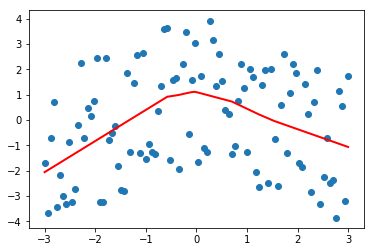

hidden.weight tensor([[ 0.3407],
        [ 0.8973],
        [-0.0497],
        [-0.8285],
        [ 0.8495],
        [-1.2315],
        [-0.6346],
        [-0.5862],
        [ 0.7030],
        [ 0.4085]])
hidden.bias tensor([ 0.0021,  0.0199, -0.8731, -0.0420, -0.5967, -0.7090,  0.7882,
         0.9019,  0.2520,  0.0789])
output.weight tensor([[-0.0419, -0.4103, -0.0256, -0.6678, -0.4946, -0.7483,  0.1502,
          0.2610,  0.2080, -0.1106]])
output.bias tensor([ 0.7119])


In [3]:
class RegressionNet(nn.Module):
    def __init__(self, in_features):
        # default first clause
        super(RegressionNet, self).__init__()
        self.hidden = nn.Linear(in_features, 10)
        self.output = nn.Linear(10, 1)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x
        
regressionNet = RegressionNet(1)
print(regressionNet)
    
loss_func = nn.MSELoss()
optimizer = optim.SGD(regressionNet.parameters(), lr=0.01)

for i in range(1000):
    regressionNet.zero_grad()
    predictions = regressionNet(x)
    loss = loss_func(predictions, y)
    #print('step: {}, loss: {}'.format(i, loss))
    loss.backward()
    optimizer.step()
    

plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), predictions.data.numpy(), 'r', lw=2)
plt.show()

# print model name
for name, param in regressionNet.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Classification

In [4]:
References:  
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

SyntaxError: invalid syntax (<ipython-input-4-92976bd7f415>, line 1)